## Importing packages

In [1]:
import numpy as np
import pandas as pd
import os
import dask
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.interpolate import interpn

from scipy.interpolate import griddata

# retina
%config InlineBackend.figure_format = 'retina'

## Load reference simulation

In [2]:
sp_path = "/Users/jerrylin/Desktop/OfflineWork/data/spcamTrim/"
sp_list = os.popen(" ".join(["ls", sp_path + "*.h1.000*"])).read().splitlines()
sp_data = xr.open_mfdataset(sp_list)

## Get monthly averaged variables and define pressure grid

In [3]:
sp_temp = sp_data["NNTBP"].groupby("time.month").mean("time")
sp_hum = sp_data["NNQBP"].groupby("time.month").mean("time")
sp_lon = sp_data["lon"]
sp_lat = sp_data["lat"]
sp_lev = sp_data["lev"]
sp_hyam = sp_data["hyam"].groupby("time.month").mean("time")
sp_hybm = sp_data["hybm"].groupby("time.month").mean("time")
sp_ps = sp_data["NNPS"].groupby("time.month").mean("time")
sp_pg = sp_hyam*1e5 + sp_ps*sp_hybm

Y_pres = sp_pg.mean(dim = ["month", "lon"]).values


## Define paths for NN runs

In [4]:
new_path = "/Users/jerrylin/Desktop/OfflineWork/data/new_runs/"

#63, 81, 95, 96, 138
relative_new = [new_path + "relative/" + "relative_model_138/", \
                new_path + "relative/" + "relative_model_252/", \
                new_path + "relative/" + "relative_model_210/", \
                new_path + "relative/" + "relative_model_096/", \
                new_path + "relative/" + "relative_model_068/"]
#12, 24, 91, 99, 108
expanded_new = [new_path + "expanded/" + "expanded_model_108/", \
                new_path + "expanded/" + "expanded_model_011/", \
                new_path + "expanded/" + "expanded_model_163/", \
                new_path + "expanded/" + "expanded_model_058/", \
                new_path + "expanded/" + "expanded_model_161/"]
#59, 72, 112, 173, 193
previous_new = [new_path + "previous/" + "previousTendencies_model_112/", \
                new_path + "previous/" + "previousTendencies_model_072/", \
                new_path + "previous/" + "previousTendencies_model_139/", \
                new_path + "previous/" + "previousTendencies_model_059/", \
                new_path + "previous/" + "previousTendencies_model_107/"]

## Calculate differences

In [5]:
def get_nn_temp_diff(nn_path):
    nn_list = os.popen(" ".join(["ls", nn_path + "*.h1.0000*"])).read().splitlines()
    nn_output = xr.open_mfdataset(nn_list)
    nn_temp = nn_output["NNTBP"].groupby("time.month").mean("time")
    nn_temp_diff = (nn_temp - sp_temp).mean(dim = ["month", "lon"])
    return nn_temp_diff.values

rel_diffs = [get_nn_temp_diff(x) for x in relative_new]
exp_diffs = [get_nn_temp_diff(x) for x in expanded_new]
prev_diffs = [get_nn_temp_diff(x) for x in previous_new]

## Define plotting function

In [7]:
def peer(rel_diffs, exp_diffs, prev_diffs, vmin, vmax):
    fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(12, 8),
                         gridspec_kw={'width_ratios': [1, 1, 1, 1, 1.2]})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[0,2]
    ax4 = ax[0,3]
    ax5 = ax[0,4]

    ax6 = ax[1,0]
    ax7 = ax[1,1]
    ax8 = ax[1,2]
    ax9 = ax[1,3]
    ax10 = ax[1,4]

    ax11 = ax[2,0]
    ax12 = ax[2,1]
    ax13 = ax[2,2]
    ax14 = ax[2,3]
    ax15 = ax[2,4]

    X, Y = np.meshgrid(np.sin(sp_lat*np.pi/180), sp_lev)

    pcm1 = ax1.pcolormesh(X, Y, rel_diffs[0], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax1.set_xticks([])
    ax1.set_ylabel("Relative Humidity (RH) \n \n Pressure (hPa)", fontsize = 14)
    ax1.set_ylim(ax1.get_ylim()[::-1])
    
    pcm2 = ax2.pcolormesh(X, Y, rel_diffs[1], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_ylim(ax2.get_ylim()[::-1])

    pcm3 = ax3.pcolormesh(X, Y, rel_diffs[2], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_ylim(ax3.get_ylim()[::-1])

    pcm4 = ax4.pcolormesh(X, Y, rel_diffs[3], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.set_ylim(ax4.get_ylim()[::-1])

    pcm5 = ax5.pcolormesh(X, Y, rel_diffs[4], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax5.set_xticks([])
    ax5.set_yticks([])
    fig.colorbar(pcm5, ax = ax5)
    ax5.set_ylim(ax5.get_ylim()[::-1])

    pcm6 = ax6.pcolormesh(X, Y, exp_diffs[0], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax6.set_xticks([])
    ax6.set_ylabel("Expanded Variables (EV) \n \n Pressure (hPa)", fontsize = 14)
    ax6.set_ylim(ax6.get_ylim()[::-1])

    pcm7 = ax7.pcolormesh(X, Y, exp_diffs[1], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax7.set_xticks([])
    ax7.set_yticks([])
    ax7.set_ylim(ax7.get_ylim()[::-1])

    pcm8 = ax8.pcolormesh(X, Y, exp_diffs[2], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax8.set_xticks([])
    ax8.set_yticks([])
    ax8.set_ylim(ax8.get_ylim()[::-1])

    pcm9 = ax9.pcolormesh(X, Y, exp_diffs[3], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax9.set_xticks([])
    ax9.set_yticks([])
    ax9.set_ylim(ax9.get_ylim()[::-1])

    pcm10 = ax10.pcolormesh(X, Y, exp_diffs[4], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax10.set_xticks([])
    ax10.set_yticks([])
    fig.colorbar(pcm10, ax = ax10)
    ax10.set_ylim(ax10.get_ylim()[::-1])

    pcm11 = ax11.pcolormesh(X, Y, prev_diffs[0], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax11.set_xlabel("latitude", fontsize = 14)
    ax11.xaxis.set_ticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)])
    ax11.xaxis.set_ticklabels(['50$^\circ$S', '0$^\circ$', '50$^\circ$N'], fontsize = 14)
    ax11.set_ylabel("Previous Tendencies (PT) \n \n Pressure (hPa)", fontsize = 14)
    ax11.set_ylim(ax11.get_ylim()[::-1])

    pcm12 = ax12.pcolormesh(X, Y, prev_diffs[1], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax12.set_yticks([])
    ax12.set_xlabel("latitude", fontsize = 14)
    ax12.xaxis.set_ticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)])
    ax12.xaxis.set_ticklabels(['50$^\circ$S', '0$^\circ$', '50$^\circ$N'], fontsize = 14)
    ax12.set_ylim(ax12.get_ylim()[::-1])

    pcm13 = ax13.pcolormesh(X, Y, prev_diffs[2], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax13.set_yticks([])
    ax13.set_xlabel("latitude", fontsize = 14)
    ax13.xaxis.set_ticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)])
    ax13.xaxis.set_ticklabels(['50$^\circ$S', '0$^\circ$', '50$^\circ$N'], fontsize = 14)
    ax13.set_ylim(ax13.get_ylim()[::-1])

    pcm14 = ax14.pcolormesh(X, Y, prev_diffs[3], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax14.set_yticks([])
    ax14.set_xlabel("latitude", fontsize = 14)
    ax14.xaxis.set_ticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)])
    ax14.xaxis.set_ticklabels(['50$^\circ$S', '0$^\circ$', '50$^\circ$N'], fontsize = 14)
    ax14.set_ylim(ax14.get_ylim()[::-1])

    pcm15 = ax15.pcolormesh(X, Y, prev_diffs[4], cmap = "bwr", vmin = vmin, vmax = vmax)
    ax15.set_yticks([])
    fig.colorbar(pcm15, ax = ax15)
    ax15.set_xlabel("latitude", fontsize = 14)
    ax15.xaxis.set_ticks([np.sin(-50/180*np.pi), 0, np.sin(50/180*np.pi)])
    ax15.xaxis.set_ticklabels(['50$^\circ$S', '0$^\circ$', '50$^\circ$N'], fontsize = 14)
    ax15.set_ylim(ax15.get_ylim()[::-1])

    fig.suptitle(t = "Averaged Temperature Error in K (emulator - SP reference) for top five models in three configurations", \
                 x = .73, y = 1.55, fontsize = 16)
    plt.subplots_adjust(hspace=0.1, wspace=.1)
    plt.subplots_adjust(0,0,1.5,1.5)
    return

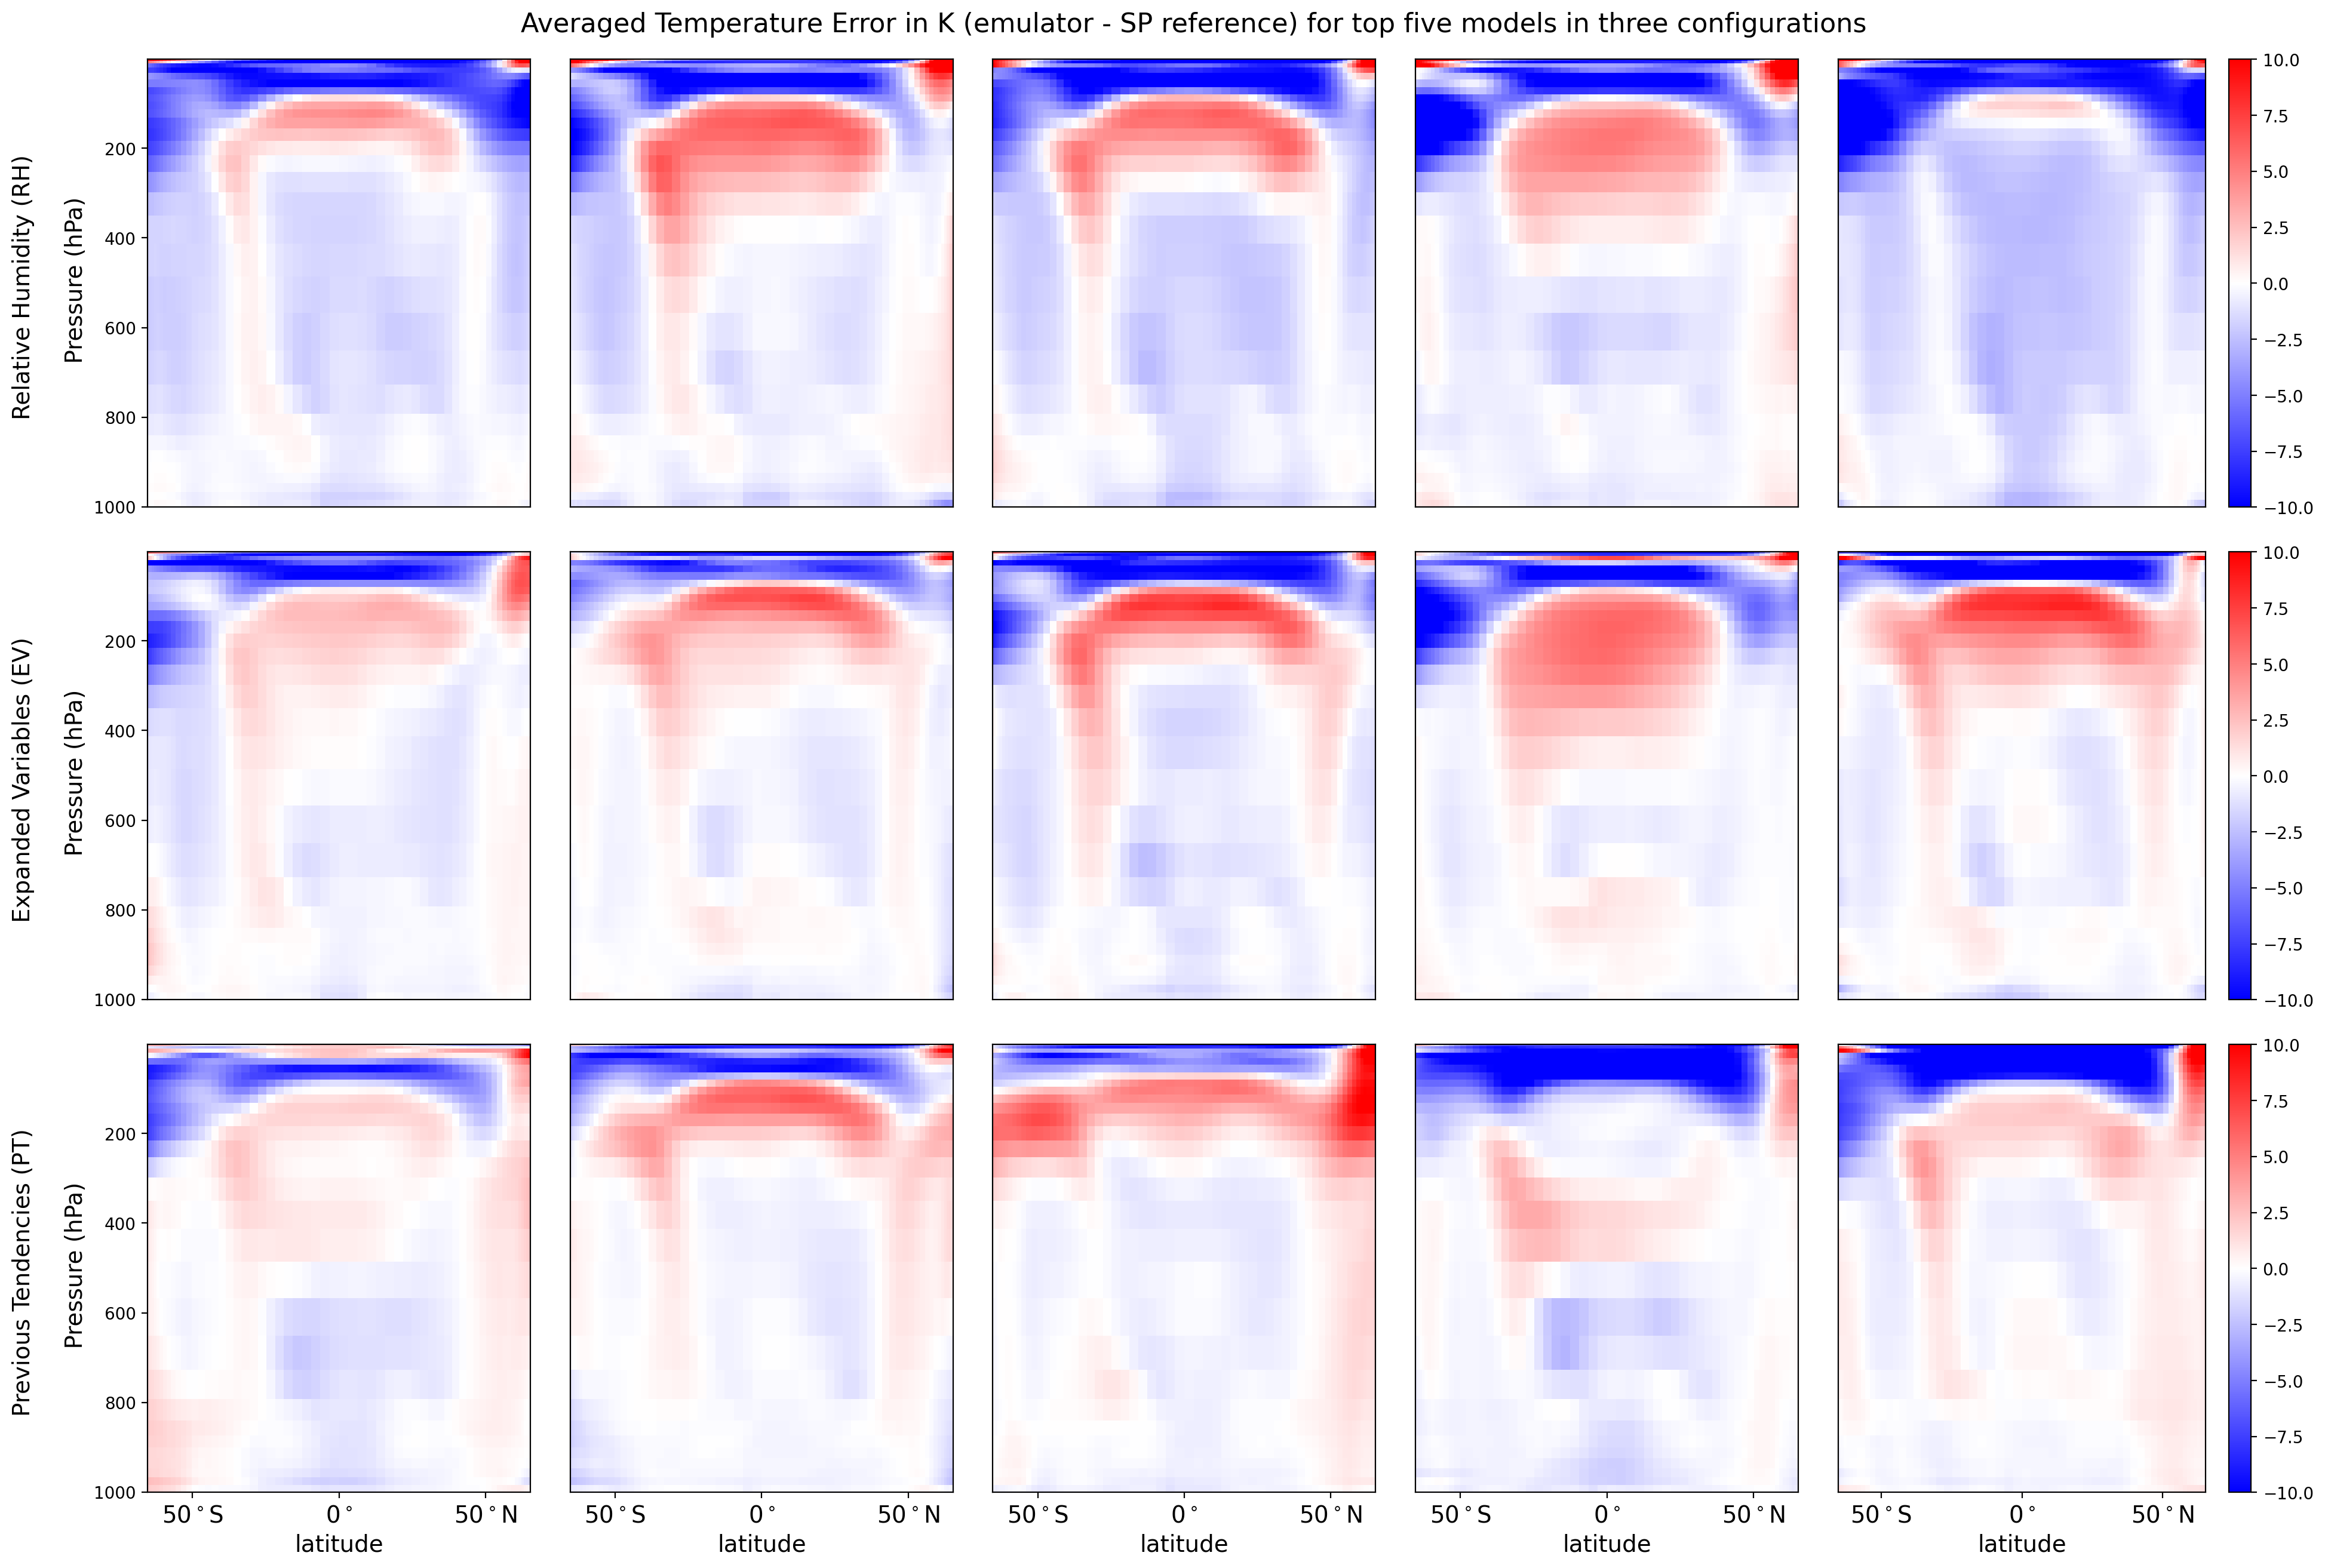

In [14]:
peer(rel_diffs, exp_diffs, prev_diffs, vmin = -10, vmax = 10)

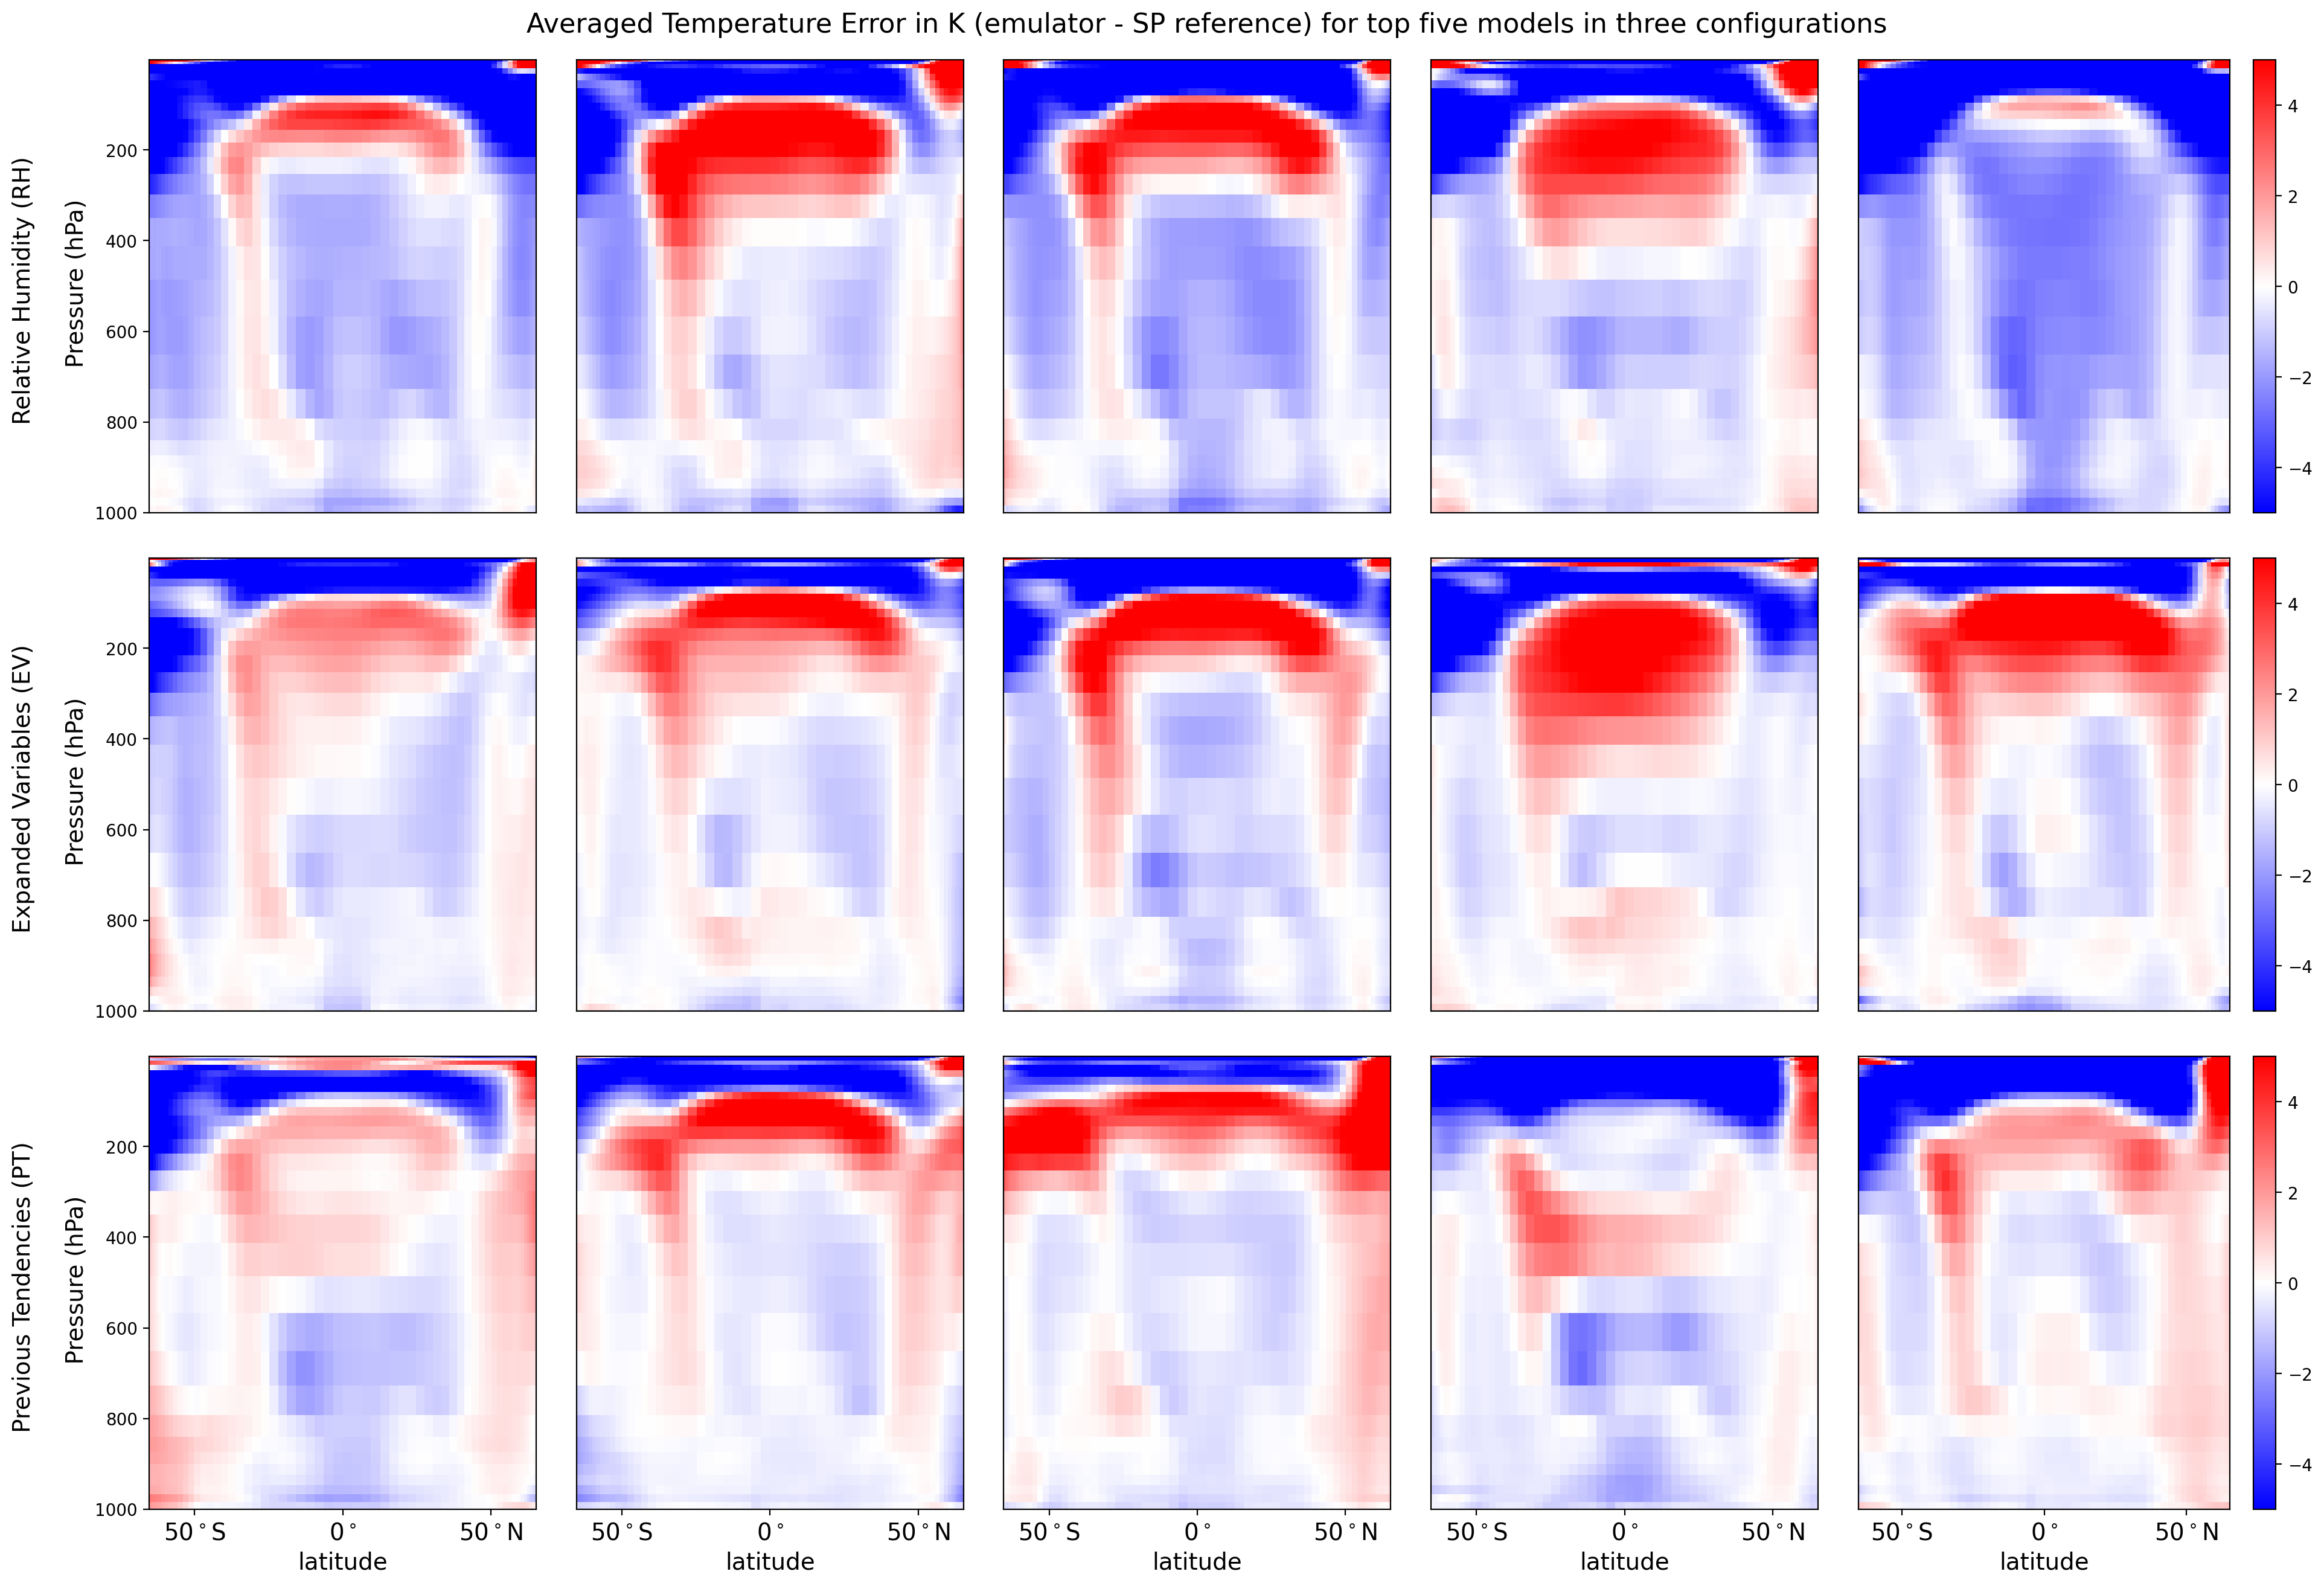

In [15]:
peer(rel_diffs, exp_diffs, prev_diffs, vmin = -5, vmax = 5)